In [2905]:
import pandas as pd
import scipy as sp
path = "./데이터/"

In [2906]:
df = pd.read_excel("./데이터/전체자료_(강우량추가).xlsx")
df.columns

Index(['Unnamed: 0', 'GU_NAME', 'ADM_NM', '동면적(k㎡)', '인구수', '인구밀도(명/km²)',
       '동단위우량', '동단위시우량', '침수횟수', '경사도', '양호비율', '도로_건물_면적_비율', '녹지_면적_비율',
       '제방', '수문', '암거', '구난시설', '노후건물개수', '노후_건물_밀도(동/km²)', '행정동_코드',
       '월평균소득', '면적당_소비액(백만원/km²)', '분기평균총지출', '고령자비율', '장애인비율', '행정동코드', '면적',
       '지하건물', '지하건물_밀도(동/km²)', '빗물펌프장까지의거리', '평균고도', '하천까지의거리', '일일최대강수량',
       '집중호우_발생횟수', '하천면적', '하천면적/면적'],
      dtype='object')

In [2907]:
df["침수여부"] = df["침수횟수"].apply(lambda x: 1 if x > 0 else 0)


In [2908]:
df = df.loc[df['침수횟수'] >0]
df

,Unnamed: 0,GU_NAME,ADM_NM,동면적(k㎡),인구수,인구밀도(명/km²),동단위우량,동단위시우량,침수횟수,경사도,...,지하건물,지하건물_밀도(동/km²),빗물펌프장까지의거리,평균고도,하천까지의거리,일일최대강수량,집중호우_발생횟수,하천면적,하천면적/면적,침수여부
2,2,종로구,부암동,2.27,9460,4167.400881,16.725406,0.699515,2,0.314583,...,813,358.149780,5699.673727,147.729398,0.579168,225.5,11,16178.933,7127.283260,1
3,3,종로구,평창동,8.87,17743,2000.338219,65.354340,2.733348,2,0.229615,...,1797,202.593010,5465.810242,273.213812,0.104944,225.5,11,32977.944,3717.919278,1
5,5,종로구,가회동,0.54,4084,7562.962963,3.978731,0.166404,1,0.097500,...,486,900.000000,3972.557785,60.501888,0.245802,225.5,11,3088.778,5719.959259,1
6,6,종로구,이화동,0.78,7651,9808.974359,5.747056,0.240362,1,0.078333,...,772,989.743590,2490.998419,45.701522,0.612614,225.5,11,0.000,0.000000,1
7,7,종로구,혜화동,1.12,19570,17473.214290,8.252183,0.345135,1,0.078333,...,1428,1275.000000,3300.974941,58.444812,0.916657,225.5,11,0.000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,401,강동구,성내2동,0.67,23414,34946.268660,5.893320,0.239663,19,0.055000,...,1326,1979.104478,909.339214,18.574853,1.992085,398.5,13,0.000,0.000000,1
402,402,강동구,성내3동,0.71,22984,32371.830990,6.245160,0.253972,12,0.072143,...,788,1109.859155,1179.328824,17.434927,1.346759,398.5,13,0.000,0.000000,1
403,403,강동구,길동,1.61,45225,28090.062110,14.161560,0.575907,9,0.176154,...,1319,819.254658,1960.757507,28.949684,1.073927,398.5,13,1569.521,974.857764,1
404,404,강동구,둔촌1동,0.92,74,80.434783,8.092320,0.329090,3,0.151786,...,6,6.521739,1646.603436,30.338302,1.163773,398.5,13,508.659,552.890217,1


In [2954]:
df.describe()

,인구밀도(명/km²),침수횟수,경사도,양호비율,도로_건물_면적_비율,녹지_면적_비율,제방,수문,암거,노후_건물_밀도(동/km²),면적당_소비액(백만원/km²),지하건물_밀도(동/km²),빗물펌프장까지의거리,평균고도,하천까지의거리,일일최대강수량,집중호우_발생횟수,하천면적,하천면적/면적,침수여부
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,2.660000e+02,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,2.660000e+02,266.000000,266.0
mean,22985.419178,32.778195,0.124168,0.664441,0.344785,0.108797,17.127820,2.154135,52.890977,890.194060,2.959780e-06,952.647859,1771.384784,42.995618,0.948243,463.234962,10.417293,7.352796e+04,37634.490689,1.0
std,10979.551981,80.223506,0.078887,0.232293,0.143087,0.133270,38.400062,8.828915,75.302004,642.045662,8.064250e-07,667.143386,1497.396447,38.446165,0.647488,186.313689,2.160259,2.915579e+05,101122.933105,0.0
min,80.434783,1.000000,0.005000,0.006173,0.046730,0.000741,0.000000,0.000000,1.000000,1.176471,1.903017e-06,5.223881,139.730037,7.017762,0.076681,163.000000,7.000000,0.000000e+00,0.000000,1.0
25%,15001.003200,2.000000,0.066667,0.511988,0.242400,0.022957,0.000000,0.000000,14.000000,438.457453,2.369918e-06,424.771320,726.305813,17.745579,0.466829,316.000000,8.000000,0.000000e+00,0.000000,1.0
50%,23627.525065,6.500000,0.105227,0.704780,0.343359,0.062504,5.000000,0.000000,30.000000,740.272427,2.757355e-06,836.904762,1370.517229,33.238638,0.774130,415.500000,11.000000,5.309675e+02,216.683028,1.0
75%,31530.906527,29.750000,0.178782,0.841996,0.467315,0.136079,19.000000,1.000000,62.750000,1233.905510,3.287952e-06,1344.783802,2360.875158,51.375625,1.306361,607.500000,12.000000,2.042392e+04,17328.163257,1.0
max,49830.434780,880.000000,0.407000,1.000000,0.644053,0.797978,455.000000,118.000000,630.000000,2941.111111,6.648582e-06,2765.476190,7708.749178,273.213812,3.556297,967.000000,16.000000,3.551699e+06,672061.387063,1.0


In [2950]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

data = [
    [5.229, 2765.476],
    [7, 16],
    [0.0007, 0.8],
    [163, 967],
    [0.006, 10],
    [1.176, 294.11],
    [137.73, 7708.75],
    [0.0766, 3.556],
    [7.018, 273.214],
    [0, 672661.367],
]
d1 = [0.0671, -16.2541, 0, 0.3053, -39.1326, 0, 0, -34.8680, -1.1193, -0.0002]
d2 = [-0.0143, -4.153, 19.9668, 0.0897, -20.2167, 0.022, -0.0004, 4.9867, 0]
d3 = [
    -0.1631,
    -4.1802,
    110.2180,
    0.3564,
    -67.9697,
    0.2344,
    0,
    -42.7403,
    -0.8331,
    0.0018,
]

new_d1 = []
new_d2 = []
new_d3 = []

for i in range(len(data)):
    value_d1 = sum(d * (data[i][1] - data[i][0]) for d in d1)
    value_d2 = sum(d * (data[i][1] - data[i][0]) for d in d2)
    value_d3 = sum(d * (data[i][1] - data[i][0]) for d in d3)

    new_d1.append(value_d1)
    new_d2.append(value_d2)
    new_d3.append(value_d3)

print("New D1:", new_d1)
print("New D2:", new_d2)
print("New D3:", new_d3)

New D1: [-251187.44544460002, -819.0162, -72.73773874, -73165.4472, -909.4719892000002, -26657.521281200003, -688976.4478359999, -316.63166292, -24224.3151528, -61213395.18746059]
New D2: [1879.176157599999, 6.127200000000009, 0.5441634399999997, 547.3631999999984, 6.803915200000006, 199.4294671999994, 5154.350416000008, 2.3687755199999962, 181.2262367999997, 457947.8586536022]
New D3: [-14010.46172260006, -45.68220000000004, -4.0570869400000085, -4080.943200000001, -50.727545199999994, -1486.8743971999957, -38428.9833159999, -17.66073851999999, -1351.1576567999996, -3414294.566618599]


In [2953]:
df['도로_건물_면적_비율'].max()

0.644052677

In [2951]:
from sklearn.preprocessing import MinMaxScaler

data = [
    [5.229, 2765.476],
    [7, 16],
    [0.0007, 0.8],
    [163, 967],
    [0.006, 10],
    [1.176, 294.11],
    [137.73, 7708.75],
    [0.0766, 3.556],
    [7.018, 273.214],
    [0, 672661.367],
    [0.047, 0.644]
]
d1 = [0,0, -16.2541, -1.1193, -34.8680, 0.3053, -22.0810, -0.0002, -39.1326]
d2 = [
    -0.0143,
    -4.4153,
    19.9668,
    0.0897,
    -20.2161,
    0.0220,
    -0.0004,
    0.1667,
    4.987,
]
d3 = [0.2344, 0.3564, -0.1631, -4.1802, -0.8331, -42.7403, -67.9697, 110.180, 0.0018]

new_d1 = []
new_d2 = []
new_d3 = []

for i in range(len(data)):
    value_d1 = sum(d * (data[i][1] - data[i][0]) for d in d1)
    value_d2 = sum(d * (data[i][1] - data[i][0]) for d in d2)
    value_d3 = sum(d * (data[i][1] - data[i][0]) for d in d3)

    new_d1.append(value_d1)
    new_d2.append(value_d2)
    new_d3.append(value_d3)

print("New D1:", new_d1)
print("New D2:", new_d2)
print("New D3:", new_d3)

New D1: [-312136.4594516, -1017.7452, -90.38708204, -90918.5712, -1130.1495032, -33125.7969352, -856152.140456, -393.46029432000006, -30102.1890288, -76066430.8321876]
New D2: [1617.780766699996, 5.274899999999988, 0.46846972999999936, 471.22439999999824, 5.8574833999999925, 171.6886173999992, 4437.374821999991, 2.039276339999992, 156.0174755999999, 394246.82719869865]
New D3: [-14115.351108599982, -46.024199999999865, -4.08746033999999, -4111.4952, -51.1073172, -1498.0058891999981, -38716.68207599985, -17.79295571999999, -1361.2731047999973, -3439855.6985646053]


In [2910]:
# df=df.drop(
#     columns=[
#         "Unnamed: 0",
#         "GU_NAME",
#         "ADM_NM",
#         "동면적(k㎡)",
#         "인구수",
#         "인구밀도(명/km²)",
#         "동단위우량",
#         "동단위시우량",
#         "병원",
#         "경찰",
#         "소방서",
#         "행정동_코드",
#         "월평균소득",
#         "분기평균총지출",
#         "고령자비율",
#         "장애인비율", 
#         "행정동코드",
#         "면적",
#         "침수횟수"
#     ],
#     axis=1,
# )

In [2911]:
df = df.drop(
    columns=[
        "Unnamed: 0",
        "ADM_NM",
        "지하건물",
        "동면적(k㎡)",
        "노후건물개수",
        "인구수",
        "동단위우량",
        "동단위시우량",
        "구난시설",
        "행정동_코드",
        "월평균소득",
        "분기평균총지출",
        "고령자비율",
        "장애인비율",
        "행정동코드",
        "면적",
    ],
    axis=1,
)

In [2912]:
# df = df.drop(
#     columns=[
#         "Unnamed: 0",
#         "ADM_NM",
#         "동면적(k㎡)",
#         "인구수",
#         "행정동_코드",
#         "행정동코드",
#         "면적",
#         "침수횟수",
#     ],
#     axis=1,
# )

In [2913]:
# df = df.drop(
#     columns=[
#         "Unnamed: 0",
#         "ADM_NM",
#         "동면적(k㎡)",
#         "인구수",
#         "행정동_코드",
#         "행정동코드",
#         "면적"
#     ],
#     axis=1,
# )

In [2914]:
df[''].max()

KeyError: ''

In [ ]:
path3 = path + "서울시_강우량_정보_2022년/"
rain_dict = {}
for i in range(1, 13):
    rain_dict[i] = pd.read_csv(path3 + f"서울시_강우량_정보_2022년{i}월.csv", encoding="euc-kr")
rain_data = pd.concat([rain_dict[i][rain_dict[i]["10분우량"] != 0] for i in range(1, 13)])
rain_agg = rain_data.groupby(["구청명"])["10분우량"].agg(["sum", "count"])
rain_agg.rename(
    columns=dict(zip(["sum", "count"], ["누적강수량", "10분당 측정(횟수)"])), inplace=True
)
rain_agg.index.rename(None, inplace=True)

In [ ]:
rain_agg["추정시우량(연간)"] = rain_agg["누적강수량"] / (rain_agg["10분당 측정(횟수)"] / 6)

In [ ]:
rain_agg.reset_index(inplace=True)

In [ ]:
rain_agg.rename(columns={"index": "GU_NAME", "sum": "강수량"}, inplace=True)
rain_agg.drop(columns=["10분당 측정(횟수)", "추정시우량(연간)"],axis=1, inplace=True)

In [ ]:
df = pd.merge(df,rain_agg, on="GU_NAME")

In [ ]:
df.drop("GU_NAME",axis=1,inplace=True)

In [ ]:
df

,인구밀도(명/km²),침수횟수,경사도,양호비율,도로_건물_면적_비율,녹지_면적_비율,제방,수문,암거,노후_건물_밀도(동/km²),...,지하건물_밀도(동/km²),빗물펌프장까지의거리,평균고도,하천까지의거리,일일최대강수량,집중호우_발생횟수,하천면적,하천면적/면적,침수여부,누적강수량
0,4167.400881,2,0.314583,0.906250,0.147000,0.225413,40,3,40,428.193833,...,358.149780,5699.673727,147.729398,0.579168,225.5,11,16178.933,7127.283260,1,2953.5
1,2000.338219,2,0.229615,0.974132,0.087765,0.164587,83,20,171,150.056370,...,202.593010,5465.810242,273.213812,0.104944,225.5,11,32977.944,3717.919278,1,2953.5
2,7562.962963,1,0.097500,0.676056,0.371271,0.128063,5,0,30,442.592593,...,900.000000,3972.557785,60.501888,0.245802,225.5,11,3088.778,5719.959259,1,2953.5
3,9808.974359,1,0.078333,0.969072,0.393989,0.133864,1,0,74,738.461538,...,989.743590,2490.998419,45.701522,0.612614,225.5,11,0.000,0.000000,1,2953.5
4,17473.214290,1,0.078333,0.942857,0.382785,0.125391,3,0,107,991.964286,...,1275.000000,3300.974941,58.444812,0.916657,225.5,11,0.000,0.000000,1,2953.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,34946.268660,19,0.055000,0.886957,0.510793,0.005971,0,0,12,1737.313433,...,1979.104478,909.339214,18.574853,1.992085,398.5,13,0.000,0.000000,1,3426.5
262,32371.830990,12,0.072143,0.633929,0.438031,0.005765,0,0,17,598.591549,...,1109.859155,1179.328824,17.434927,1.346759,398.5,13,0.000,0.000000,1,3426.5
263,28090.062110,9,0.176154,0.608911,0.358275,0.059004,4,0,21,554.037267,...,819.254658,1960.757507,28.949684,1.073927,398.5,13,1569.521,974.857764,1,3426.5
264,80.434783,3,0.151786,0.738636,0.229434,0.045133,0,0,9,11.956522,...,6.521739,1646.603436,30.338302,1.163773,398.5,13,508.659,552.890217,1,3426.5


In [ ]:
df

,인구밀도(명/km²),침수횟수,경사도,양호비율,도로_건물_면적_비율,녹지_면적_비율,제방,수문,암거,노후_건물_밀도(동/km²),...,지하건물_밀도(동/km²),빗물펌프장까지의거리,평균고도,하천까지의거리,일일최대강수량,집중호우_발생횟수,하천면적,하천면적/면적,침수여부,누적강수량
0,4167.400881,2,0.314583,0.906250,0.147000,0.225413,40,3,40,428.193833,...,358.149780,5699.673727,147.729398,0.579168,225.5,11,16178.933,7127.283260,1,2953.5
1,2000.338219,2,0.229615,0.974132,0.087765,0.164587,83,20,171,150.056370,...,202.593010,5465.810242,273.213812,0.104944,225.5,11,32977.944,3717.919278,1,2953.5
2,7562.962963,1,0.097500,0.676056,0.371271,0.128063,5,0,30,442.592593,...,900.000000,3972.557785,60.501888,0.245802,225.5,11,3088.778,5719.959259,1,2953.5
3,9808.974359,1,0.078333,0.969072,0.393989,0.133864,1,0,74,738.461538,...,989.743590,2490.998419,45.701522,0.612614,225.5,11,0.000,0.000000,1,2953.5
4,17473.214290,1,0.078333,0.942857,0.382785,0.125391,3,0,107,991.964286,...,1275.000000,3300.974941,58.444812,0.916657,225.5,11,0.000,0.000000,1,2953.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,34946.268660,19,0.055000,0.886957,0.510793,0.005971,0,0,12,1737.313433,...,1979.104478,909.339214,18.574853,1.992085,398.5,13,0.000,0.000000,1,3426.5
262,32371.830990,12,0.072143,0.633929,0.438031,0.005765,0,0,17,598.591549,...,1109.859155,1179.328824,17.434927,1.346759,398.5,13,0.000,0.000000,1,3426.5
263,28090.062110,9,0.176154,0.608911,0.358275,0.059004,4,0,21,554.037267,...,819.254658,1960.757507,28.949684,1.073927,398.5,13,1569.521,974.857764,1,3426.5
264,80.434783,3,0.151786,0.738636,0.229434,0.045133,0,0,9,11.956522,...,6.521739,1646.603436,30.338302,1.163773,398.5,13,508.659,552.890217,1,3426.5


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, KFold, cross_validate
import seaborn as sb
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans


MinMaxScaler = MinMaxScaler()
scale_df = MinMaxScaler.fit_transform(df)

In [ ]:
sca_df = pd.DataFrame(data=scale_df, columns=df.columns)
sca_df

,인구밀도(명/km²),침수횟수,경사도,양호비율,도로_건물_면적_비율,녹지_면적_비율,제방,수문,암거,노후_건물_밀도(동/km²),...,지하건물_밀도(동/km²),빗물펌프장까지의거리,평균고도,하천까지의거리,일일최대강수량,집중호우_발생횟수,하천면적,하천면적/면적,침수여부,누적강수량
0,0.082150,0.001138,0.770108,0.905668,0.167866,0.281813,0.087912,0.025424,0.062003,0.145247,...,0.127860,0.734566,0.528602,0.144409,0.077736,0.444444,0.004555,0.010605,0.0,0.378893
1,0.038591,0.001138,0.558745,0.973971,0.068699,0.205517,0.182418,0.169492,0.270270,0.050641,...,0.071504,0.703668,1.000000,0.008122,0.077736,0.444444,0.009285,0.005532,0.0,0.378893
2,0.150403,0.000000,0.230100,0.674044,0.543326,0.159705,0.010989,0.000000,0.046105,0.150145,...,0.324165,0.506384,0.200920,0.048603,0.077736,0.444444,0.000870,0.008511,0.0,0.378893
3,0.195549,0.000000,0.182421,0.968880,0.581359,0.166981,0.002198,0.000000,0.116057,0.250783,...,0.356677,0.310644,0.145321,0.154021,0.077736,0.444444,0.000000,0.000000,0.0,0.378893
4,0.349604,0.000000,0.182421,0.942502,0.562603,0.156353,0.006593,0.000000,0.168521,0.337010,...,0.460022,0.417656,0.193192,0.241399,0.077736,0.444444,0.000000,0.000000,0.0,0.378893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0.700821,0.020478,0.124378,0.886254,0.776905,0.006560,0.000000,0.000000,0.017488,0.590536,...,0.715109,0.101679,0.043416,0.550464,0.292910,0.666667,0.000000,0.000000,0.0,0.510428
262,0.649073,0.012514,0.167022,0.631655,0.655091,0.006302,0.000000,0.000000,0.025437,0.203207,...,0.400194,0.137349,0.039133,0.365005,0.292910,0.666667,0.000000,0.000000,0.0,0.510428
263,0.563008,0.009101,0.425756,0.606482,0.521569,0.073081,0.008791,0.000000,0.031797,0.188052,...,0.294912,0.240590,0.082390,0.286596,0.292910,0.666667,0.000442,0.001451,0.0,0.510428
264,0.000000,0.002275,0.365139,0.737013,0.305872,0.055683,0.000000,0.000000,0.012719,0.003667,...,0.000470,0.199084,0.087607,0.312417,0.292910,0.666667,0.000143,0.000823,0.0,0.510428


In [ ]:
# from scipy.stats import ttest_ind

# # Assuming you have a DataFrame with a '침수여부' column and other numeric columns for the variables you want to compare
# # Replace '침수여부' with the actual column name in your DataFrame

# categorical_column = "침수여부"

# # Iterate through numeric columns
# for numeric_column in df.select_dtypes(include="number").columns:
#     if numeric_column != categorical_column:
#         group1 = sca_df[sca_df[categorical_column] == 1][numeric_column]
#         group2 = sca_df[sca_df[categorical_column] == 0][numeric_column]

#         # Perform t-test
#         t_statistic, p_value = ttest_ind(group1, group2, equal_var=False)

#         # Print the results for each column
#         print(f"T-test for {numeric_column}:")
#         print("  T-statistic:", t_statistic)
#         print("  P-value:", p_value)

#         # Check for statistical significance
#         alpha = 0.1
#         if p_value < alpha:
#             print(
#                 "  Reject the null hypothesis. There is a significant difference between groups."
#             )
#         else:
#             print(
#                 "  Fail to reject the null hypothesis. There is no significant difference between groups."
#             )

#         print("\n")

In [2932]:
df['하천까지의거리'].min()

0.0766812844480863

In [ ]:
sca_df.columns

Index(['인구밀도(명/km²)', '침수횟수', '경사도', '양호비율', '도로_건물_면적_비율', '녹지_면적_비율', '제방',
       '수문', '암거', '노후_건물_밀도(동/km²)', '면적당_소비액(백만원/km²)', '지하건물_밀도(동/km²)',
       '빗물펌프장까지의거리', '평균고도', '하천까지의거리', '일일최대강수량', '집중호우_발생횟수', '하천면적',
       '하천면적/면적', '침수여부', '누적강수량'],
      dtype='object')

In [ ]:
sca_df = sca_df[
    [
        "경사도",
        "양호비율",
        "침수횟수",
        "도로_건물_면적_비율",
        "녹지_면적_비율",
        "노후_건물_밀도(동/km²)",
        "지하건물_밀도(동/km²)",
        "하천면적/면적",
        "하천까지의거리",
        "일일최대강수량",
        "평균고도",
        "집중호우_발생횟수",
        "빗물펌프장까지의거리",
    ]
]

In [ ]:
sca_df

,경사도,양호비율,침수횟수,도로_건물_면적_비율,녹지_면적_비율,노후_건물_밀도(동/km²),지하건물_밀도(동/km²),하천면적/면적,하천까지의거리,일일최대강수량,평균고도,집중호우_발생횟수,빗물펌프장까지의거리
0,0.770108,0.905668,0.001138,0.167866,0.281813,0.145247,0.127860,0.010605,0.144409,0.077736,0.528602,0.444444,0.734566
1,0.558745,0.973971,0.001138,0.068699,0.205517,0.050641,0.071504,0.005532,0.008122,0.077736,1.000000,0.444444,0.703668
2,0.230100,0.674044,0.000000,0.543326,0.159705,0.150145,0.324165,0.008511,0.048603,0.077736,0.200920,0.444444,0.506384
3,0.182421,0.968880,0.000000,0.581359,0.166981,0.250783,0.356677,0.000000,0.154021,0.077736,0.145321,0.444444,0.310644
4,0.182421,0.942502,0.000000,0.562603,0.156353,0.337010,0.460022,0.000000,0.241399,0.077736,0.193192,0.444444,0.417656
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0.124378,0.886254,0.020478,0.776905,0.006560,0.590536,0.715109,0.000000,0.550464,0.292910,0.043416,0.666667,0.101679
262,0.167022,0.631655,0.012514,0.655091,0.006302,0.203207,0.400194,0.000000,0.365005,0.292910,0.039133,0.666667,0.137349
263,0.425756,0.606482,0.009101,0.521569,0.073081,0.188052,0.294912,0.001451,0.286596,0.292910,0.082390,0.666667,0.240590
264,0.365139,0.737013,0.002275,0.305872,0.055683,0.003667,0.000470,0.000823,0.312417,0.292910,0.087607,0.666667,0.199084


In [ ]:
# correlation_matrix = df.corr()
# correlation_with_flooding = correlation_matrix["침수횟수"]

In [ ]:
df = df.drop("침수여부",axis=1)

In [ ]:
sca_df

,경사도,양호비율,침수횟수,도로_건물_면적_비율,녹지_면적_비율,노후_건물_밀도(동/km²),지하건물_밀도(동/km²),하천면적/면적,하천까지의거리,일일최대강수량,평균고도,집중호우_발생횟수,빗물펌프장까지의거리
0,0.770108,0.905668,0.001138,0.167866,0.281813,0.145247,0.127860,0.010605,0.144409,0.077736,0.528602,0.444444,0.734566
1,0.558745,0.973971,0.001138,0.068699,0.205517,0.050641,0.071504,0.005532,0.008122,0.077736,1.000000,0.444444,0.703668
2,0.230100,0.674044,0.000000,0.543326,0.159705,0.150145,0.324165,0.008511,0.048603,0.077736,0.200920,0.444444,0.506384
3,0.182421,0.968880,0.000000,0.581359,0.166981,0.250783,0.356677,0.000000,0.154021,0.077736,0.145321,0.444444,0.310644
4,0.182421,0.942502,0.000000,0.562603,0.156353,0.337010,0.460022,0.000000,0.241399,0.077736,0.193192,0.444444,0.417656
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0.124378,0.886254,0.020478,0.776905,0.006560,0.590536,0.715109,0.000000,0.550464,0.292910,0.043416,0.666667,0.101679
262,0.167022,0.631655,0.012514,0.655091,0.006302,0.203207,0.400194,0.000000,0.365005,0.292910,0.039133,0.666667,0.137349
263,0.425756,0.606482,0.009101,0.521569,0.073081,0.188052,0.294912,0.001451,0.286596,0.292910,0.082390,0.666667,0.240590
264,0.365139,0.737013,0.002275,0.305872,0.055683,0.003667,0.000470,0.000823,0.312417,0.292910,0.087607,0.666667,0.199084


In [ ]:
# plt.rc("font", family="Malgun Gothic")
# plt.rcParams["axes.unicode_minus"] = False  # 한글 폰트 사용시 마이너스 폰트 깨짐 해결
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(10, 10))
# plt.xticks(rotation=45)  # Corrected the typo here
# sns.boxplot(data=sca_df)  # Corrected the library name here

# plt.show()

In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# # Assuming '침수여부' is the target variable, and other columns are features
# features = sca_df.drop(["침수여부"], axis=1)
# target = sca_df["침수여부"]

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(
#     features, target, test_size=0.2, random_state=42
# )

# # Create a Logistic Regression model
# model = LogisticRegression()

# # Train the model
# model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)
# classification_rep = classification_report(y_test, y_pred)

# # Create a heatmap for the confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(
#     conf_matrix,
#     annot=True,
#     fmt="d",
#     cmap="Blues",
#     cbar=False,
#     xticklabels=["Not Flooded", "Flooded"],
#     yticklabels=["Not Flooded", "Flooded"],
# )
# plt.title("Confusion Matrix")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.show()

# # Print the results
# print(f"Accuracy: {accuracy:.2f}")
# print(f"Classification Report:\n{classification_rep}")

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.feature_selection import RFE
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import mean_squared_error, r2_score

# # Assuming X and y are your feature matrix and target variable
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

# # Create a linear regression model
# model = LinearRegression()

# # Use RFE for feature selection
# rfe = RFE(model, n_features_to_select=8)
# X_train_selected = rfe.fit_transform(X_train, y_train)
# X_test_selected = rfe.transform(X_test)

# # Train the model with the selected features
# model.fit(X_train_selected, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test_selected)

# # Evaluate the model using regression metrics
# mse = mean_squared_error(y_test, y_pred)
# r_squared = r2_score(y_test, y_pred)

# # Print the evaluation metrics
# print(f"Mean Squared Error: {mse:.2f}")
# print(f"R-squared: {r_squared:.2f}")


In [ ]:
# drop_feature = ["GU_NAME", "ADM_NM", "동면적(k㎡)", "인구수", "동단위우량", "도로_건물_면적", "침수횟수"]
# feature = data.columns.difference(drop_feature)

# pre_data = data.copy()  # 임시저장
# pre_data[feature] = minmax.transform(X=data[feature])

In [ ]:
# # k값
# import numpy as np

# k = 1 / np.log(len(pre_data))
# print(k)

In [ ]:
# def p(x):
#     if x == 1 or x == 0:
#         return 0
#     else:
#         return x * np.log(x)

In [ ]:

# sca_df =sca_df.drop("침수여부", axis=1)

In [ ]:
pca = PCA()
pca.fit_transform(sca_df)

array([[-0.72880424, -0.63279773,  0.03642473, ...,  0.06860714,
        -0.00091573,  0.03207345],
       [-0.89820732, -0.66555146, -0.01860591, ...,  0.34205163,
        -0.34053561, -0.05617126],
       [-0.1394852 , -0.21722798, -0.16345129, ...,  0.04340311,
        -0.00584974, -0.1027042 ],
       ...,
       [-0.10230139,  0.06974547,  0.12537016, ..., -0.00526893,
         0.08146869, -0.05051135],
       [-0.45841437,  0.18650034,  0.06305678, ...,  0.00862962,
         0.08656866, -0.00785733],
       [-0.4071596 , -0.01130564,  0.0836094 , ..., -0.02289356,
         0.09907635, -0.03457495]])

In [ ]:
pca.explained_variance_ratio_

array([0.31501606, 0.1734841 , 0.14797303, 0.08301992, 0.06189404,
       0.05488483, 0.0421239 , 0.0380681 , 0.03342424, 0.01904739,
       0.01190444, 0.01137408, 0.00778588])

In [ ]:
import numpy as np
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.31501606, 0.48850016, 0.63647319, 0.7194931 , 0.78138714,
       0.83627197, 0.87839588, 0.91646398, 0.94988822, 0.9689356 ,
       0.98084004, 0.99221412, 1.        ])

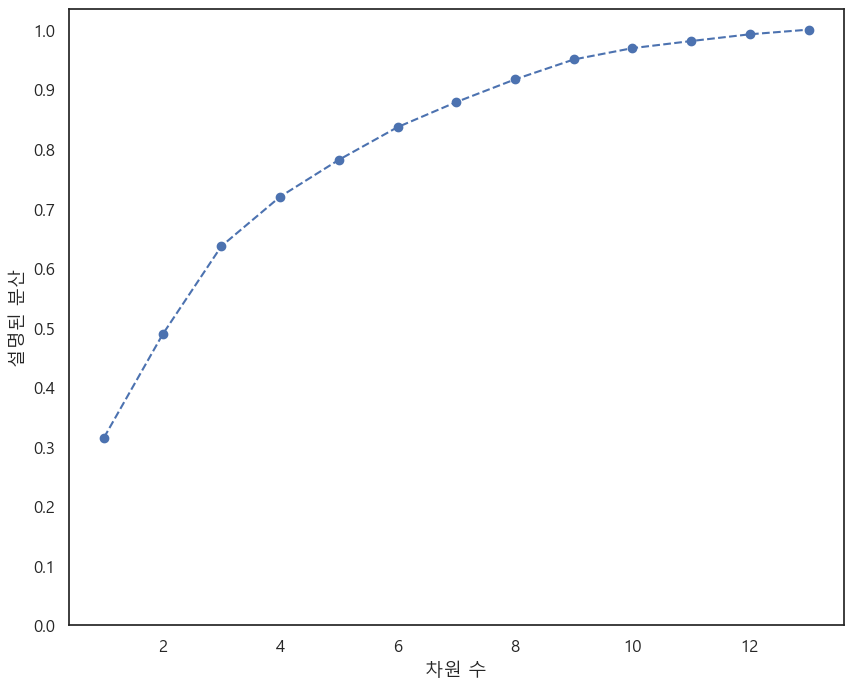

In [ ]:
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 8))

plt.plot(
    range(1, 14), pca.explained_variance_ratio_.cumsum(), marker="o", linestyle="--"
)
plt.yticks([i / 10 for i in range(11)])
plt.ylabel("설명된 분산")


plt.xlabel("차원 수")
plt.yticks

plt.rc("font", family="Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False  # 한글 폰트 사용시 마이너스 폰트 깨짐 해결

In [ ]:
pca_2 = PCA(n_components=3)
pca_2.fit(sca_df)

PCA(n_components=3)

In [ ]:
pca_2_result = pca_2.fit_transform(sca_df)

In [ ]:
results = pd.DataFrame(
    data=pca_2.fit_transform(sca_df),
    columns=["PC-1", "PC-2","PC-3"],
)

c:\Users\yis82\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  fig.canvas.draw()
c:\Users\yis82\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.draw()
c:\Users\yis82\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.draw()
c:\Users\yis82\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  fig.canvas.draw()
c:\Users\yis82\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from current font.
  fig.canvas.draw()
c:\Users\yis82\AppData\Local\Programs\Python

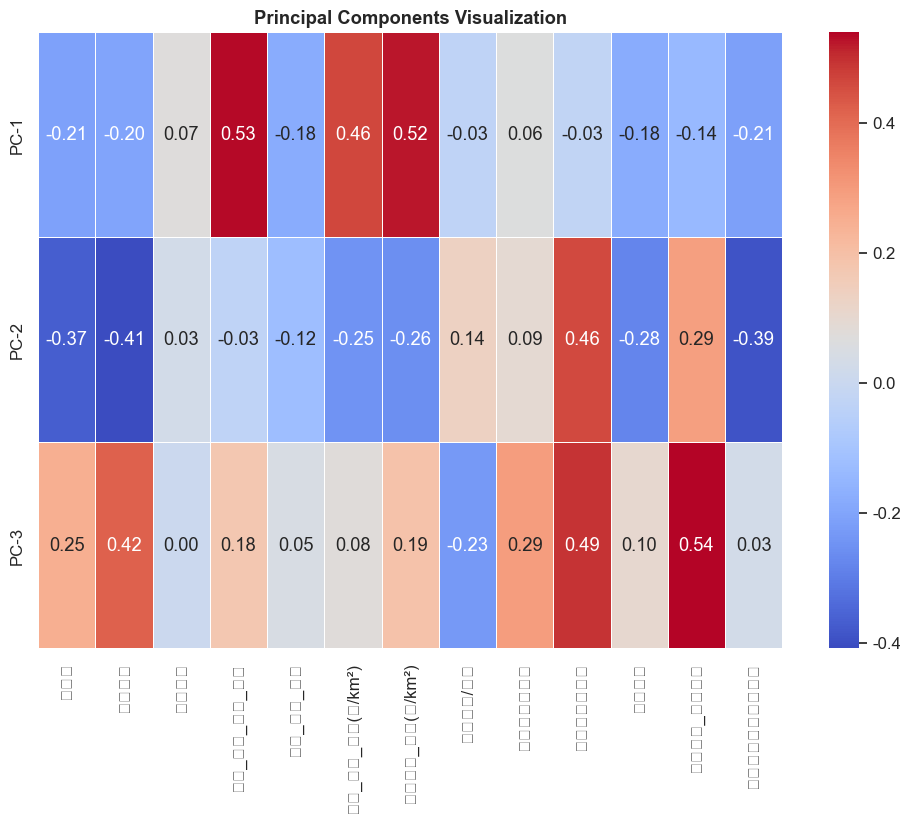

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

# Assuming pca_2_result is a 2D array with shape (n_samples, 3)
# Assuming sca_df and results are defined"

# Calculate principal components
components_df = pd.DataFrame(
    pca_2.components_, columns=sca_df.columns, index=results.columns
)

# Set Seaborn style
sb.set(style="white", font_scale=1.1)

# Create a heatmap
plt.figure(figsize=(12, 8))
sb.heatmap(components_df, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)

plt.title("Principal Components Visualization", fontweight="bold")
plt.show()

In [ ]:
components_df

,경사도,양호비율,침수횟수,도로_건물_면적_비율,녹지_면적_비율,노후_건물_밀도(동/km²),지하건물_밀도(동/km²),하천면적/면적,하천까지의거리,일일최대강수량,평균고도,집중호우_발생횟수,빗물펌프장까지의거리
PC-1,-0.209559,-0.201033,0.070967,0.534663,-0.180752,0.463714,0.523111,-0.030673,0.064869,-0.025104,-0.180950,-0.138749,-0.213657
PC-2,-0.367613,-0.407462,0.027965,-0.031572,-0.122958,-0.247638,-0.258761,0.135995,0.092730,0.459551,-0.279756,0.291184,-0.390286
PC-3,0.248377,0.419341,0.003423,0.176823,0.047057,0.077155,0.190085,-0.230521,0.294550,0.494270,0.101297,0.540115,0.026399


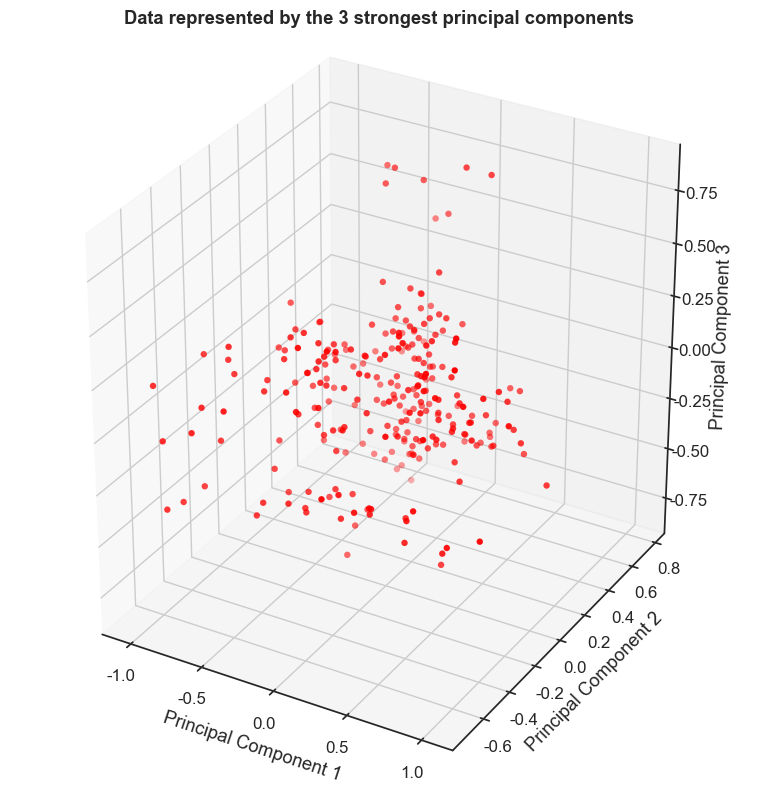

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import platform
import seaborn as sb
import matplotlib.pyplot as plt

# Assuming pca_2_result is a 2D array with shape (n_samples, 3)
x_axis = pca_2_result[:, 0]
y_axis = pca_2_result[:, 1]
z_axis = pca_2_result[:, 2]  # Add the third component for the z-axis

# Set Seaborn style with increased figure size
sb.set(style="white", rc={"figure.figsize": (12, 8)}, font_scale=1.1)

# Create a 3D scatter plot with increased figure size
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Scatter plot in 3D
ax.scatter(xs=x_axis, ys=y_axis, zs=z_axis, color="red", lw=0.1, label="Data Points")

# Set labels and title
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title(
    "Data represented by the 3 strongest principal components", fontweight="bold"
)

# Adjust the aspect ratio of the 3D plot
ax.set_box_aspect([0.8, 0.9, 0.9])  # Adjust the scaling factors as needed

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

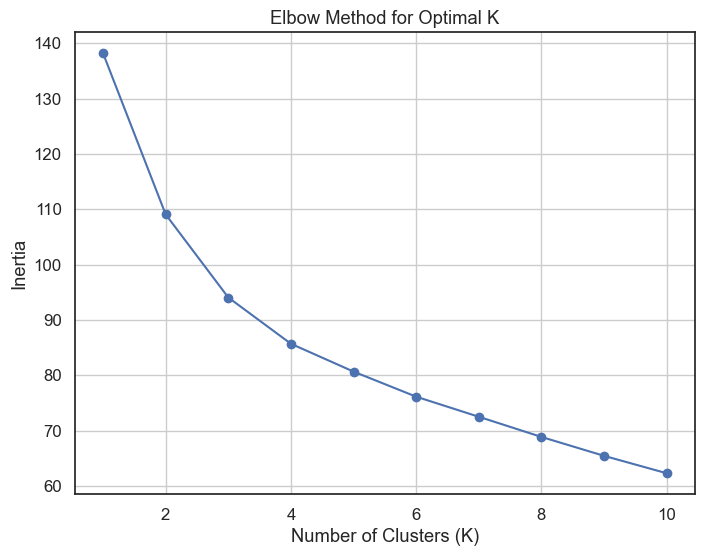

In [ ]:
inertia = []

# Define the range of K values to test
k_range = range(1, 11)  # You can adjust this range based on your problem

# Calculate the inertia for different K values
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(sca_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker="o", linestyle="-")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.grid(True)
plt.show()
plt.close()

In [ ]:
inertia = []
for i in range(2, 10):
    kmeans = KMeans(
        n_clusters=i, init="k-means++", n_init=15, max_iter=500, random_state=17
    )
    kmeans.fit(sca_df)
    inertia.append(kmeans.inertia_)

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


silhouette = {}
for i in range(2, 10):
    kmeans = KMeans(
        n_clusters=i, init="k-means++", n_init=100, max_iter=500, random_state=17
    )
    kmeans.fit(pca_score)
    silhouette[i] = silhouette_score(pca_score, kmeans.labels_, metric="euclidean")

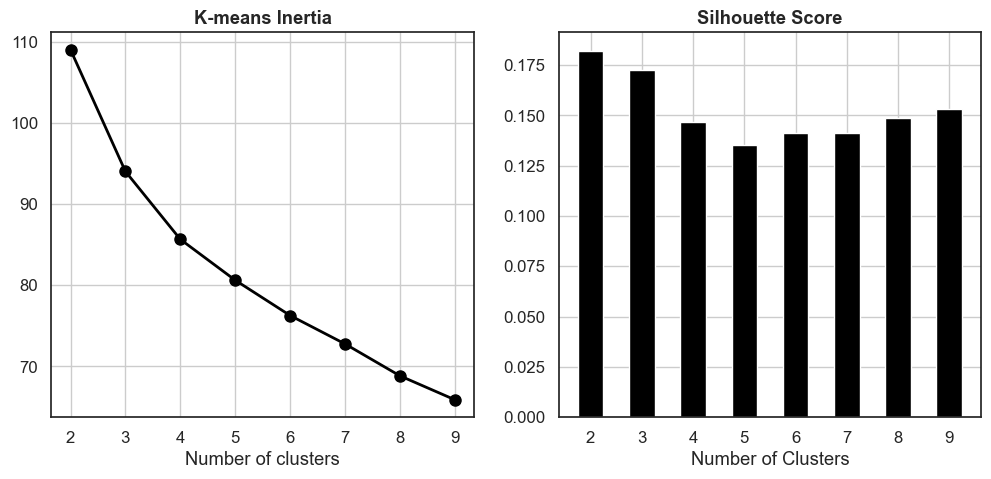

In [ ]:
sb.set(style="white", font_scale=1.1, rc={"figure.figsize": (12, 5)})

plt.subplot(1, 2, 1)

plt.plot(range(2, len(inertia) + 2), inertia, marker="o", lw=2, ms=8, color="black")
plt.xlabel("Number of clusters")
plt.title("K-means Inertia", fontweight="bold")
plt.grid(True)

plt.subplot(1, 2, 2)

plt.bar(
    range(len(silhouette)),
    list(silhouette.values()),
    align="center",
    color="black",
    width=0.5,
)
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.grid()
plt.title("Silhouette Score", fontweight="bold")
plt.xlabel("Number of Clusters")


plt.show()

In [ ]:
silhouette

{2: 0.18222319641656218,
 3: 0.17234221650189702,
 4: 0.1467466732632357,
 5: 0.1354381715066722,
 6: 0.1413038191970148,
 7: 0.14104438805117359,
 8: 0.14875304281838145,
 9: 0.15296030697470797}

In [ ]:
sca_df.columns

Index(['경사도', '양호비율', '침수횟수', '도로_건물_면적_비율', '녹지_면적_비율', '노후_건물_밀도(동/km²)',
       '지하건물_밀도(동/km²)', '하천면적/면적', '하천까지의거리', '일일최대강수량', '평균고도', '집중호우_발생횟수',
       '빗물펌프장까지의거리'],
      dtype='object')

In [ ]:
pca_score = pca.transform(sca_df)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=17, init="k-means++")
kmeans_labels = kmeans.fit_predict(pca_score)

centroids = kmeans.cluster_centers_
centroids_pca = pca_2.transform(centroids)

pd.Series(kmeans_labels).value_counts()

c:\Users\yis82\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\yis82\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


0    105
2     85
1     76
Name: count, dtype: int64

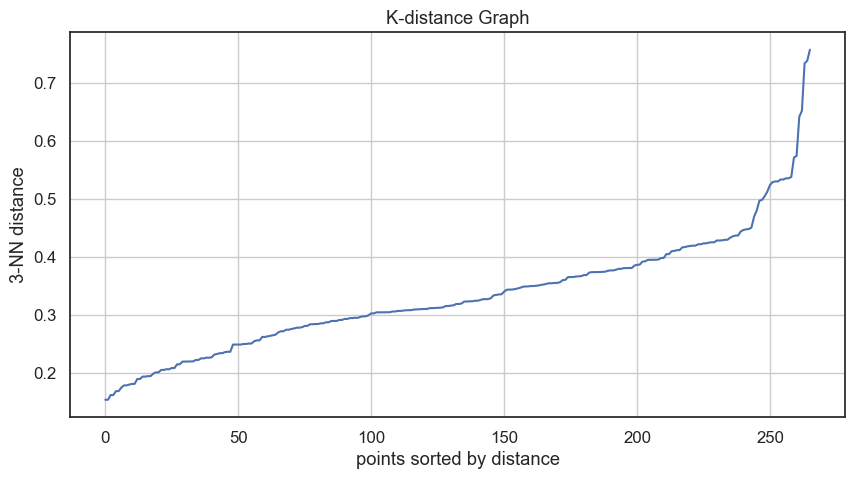

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import (
    NearestNeighbors,
)  # 차이: KNN 지도학습 <-> NearestNeighbors 비지도학습
from itertools import combinations, product

neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(sca_df)
distances, indices = neighbors_fit.kneighbors(sca_df)
s_distances = np.sort(distances, axis=0)
target = s_distances[:, 1]
target
plt.figure(figsize=(10, 5))
plt.plot(target)
plt.grid()
plt.title("K-distance Graph")
plt.ylabel("3-NN distance")
plt.xlabel("points sorted by distance")
plt.show()
plt.close()

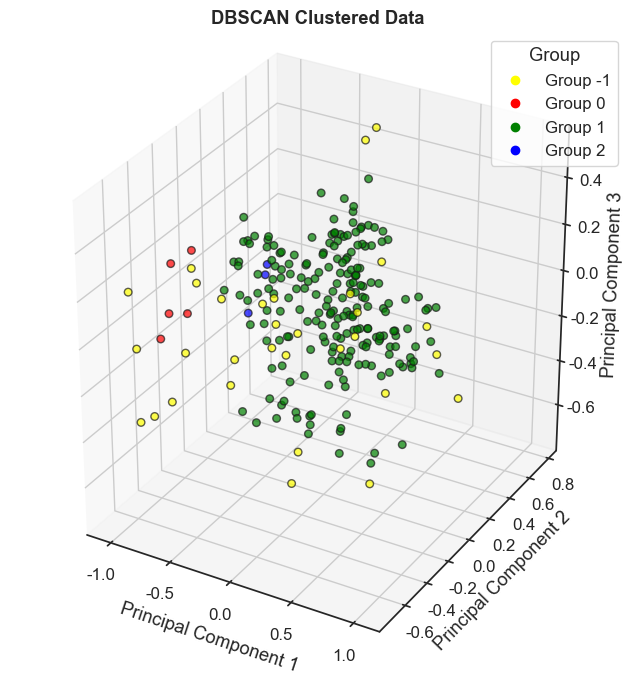

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN

# Assuming pca_2_result is a 2D array with shape (n_samples, 3)
# Assuming sca_df and results are defined

# Initialize the DBSCAN model
model = DBSCAN(eps=0.45, min_samples=3)

# Fit the model to the data and get the cluster labels
predict = pd.DataFrame(model.fit_predict(pca_score))
predict.columns = ["predict"]

# Concatenate the cluster labels with your data
r = pd.concat([sca_df, predict], axis=1)
r["x_axis"] = x_axis
r["y_axis"] = y_axis
r["z_axis"] = z_axis

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")

# Define unique colors for each cluster label
label_colors = {-1: "yellow", 0: "red", 1: "green", 2: "blue"}

# Iterate through cluster labels and plot data points with unique colors
for label, color in label_colors.items():
    if label == -1:
        ax.scatter(
            r[r["predict"] == label]["x_axis"],
            r[r["predict"] == label]["y_axis"],
            r[r["predict"] == label]["z_axis"],  # Add the third axis (z_axis)
            label=label,
            c=color,
            s=30,
            edgecolors="k",
            alpha=0.7,
        )
    else:
        ax.scatter(
            r[r["predict"] == label]["x_axis"],
            r[r["predict"] == label]["y_axis"],
            r[r["predict"] == label]["z_axis"],  # Add the third axis (z_axis)
            label=label,
            c=color,
            s=30,
            edgecolors="k",
            alpha=0.7,
        )

# Add legends and grid to the plot
legend_labels = label_colors.keys()
legend_elements = [
    plt.Line2D(
        [0], [0], marker="o", color=color, label=f"Group {label}", linestyle="None"
    )
    for label, color in label_colors.items()
]
ax.legend(handles=legend_elements, title="Group")
ax.grid()
ax.set_title("DBSCAN Clustered Data", fontweight="bold")

# Set labels for each axis
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

# Set the aspect ratio of the 3D plot
ax.set_box_aspect([0.8, 0.9, 0.9])  # Adjust the scaling factors as needed

# Show the 3D scatter plot
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

# Assuming pca_score is defined

# Initialize the DBSCAN model
model = DBSCAN(eps=0.45, min_samples=5)

# Fit the model to the data and get the cluster labels
predict = pd.DataFrame(model.fit_predict(pca_score))
predict.columns = ["predict"]

# Concatenate the cluster labels with your data
r = pd.concat([sca_df, predict], axis=1)

# Calculate the silhouette score
silhouette_avg = silhouette_score(pca_score, predict)
print(f"Silhouette Score: {silhouette_avg}")

# Continue with the rest of your code for visualization
# ...

# Show the 3D scatter plot
plt.show()

Silhouette Score: 0.14477784185686668


c:\Users\yis82\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
sca_df

,경사도,양호비율,침수횟수,도로_건물_면적_비율,녹지_면적_비율,노후_건물_밀도(동/km²),지하건물_밀도(동/km²),하천면적/면적,하천까지의거리,일일최대강수량,평균고도,집중호우_발생횟수,빗물펌프장까지의거리
0,0.770108,0.905668,0.001138,0.167866,0.281813,0.145247,0.127860,0.010605,0.144409,0.077736,0.528602,0.444444,0.734566
1,0.558745,0.973971,0.001138,0.068699,0.205517,0.050641,0.071504,0.005532,0.008122,0.077736,1.000000,0.444444,0.703668
2,0.230100,0.674044,0.000000,0.543326,0.159705,0.150145,0.324165,0.008511,0.048603,0.077736,0.200920,0.444444,0.506384
3,0.182421,0.968880,0.000000,0.581359,0.166981,0.250783,0.356677,0.000000,0.154021,0.077736,0.145321,0.444444,0.310644
4,0.182421,0.942502,0.000000,0.562603,0.156353,0.337010,0.460022,0.000000,0.241399,0.077736,0.193192,0.444444,0.417656
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0.124378,0.886254,0.020478,0.776905,0.006560,0.590536,0.715109,0.000000,0.550464,0.292910,0.043416,0.666667,0.101679
262,0.167022,0.631655,0.012514,0.655091,0.006302,0.203207,0.400194,0.000000,0.365005,0.292910,0.039133,0.666667,0.137349
263,0.425756,0.606482,0.009101,0.521569,0.073081,0.188052,0.294912,0.001451,0.286596,0.292910,0.082390,0.666667,0.240590
264,0.365139,0.737013,0.002275,0.305872,0.055683,0.003667,0.000470,0.000823,0.312417,0.292910,0.087607,0.666667,0.199084


In [ ]:
df_pca_kmeans = pd.concat(
    [sca_df, pd.DataFrame({"Segment K-means PCA": kmeans_labels})], axis=1
)
df_pca_kmeans.drop(["침수횟수"], axis=1)
df_pca_kmeans["침수횟수"] = df["침수횟수"]

In [ ]:
df["Segment K-means PCA"] = df_pca_kmeans["Segment K-means PCA"]

In [ ]:
df_pca_kmeans.groupby("Segment K-means PCA")["침수횟수"].median()

Segment K-means PCA
0     9.0
1     3.0
2    10.0
Name: 침수횟수, dtype: float64

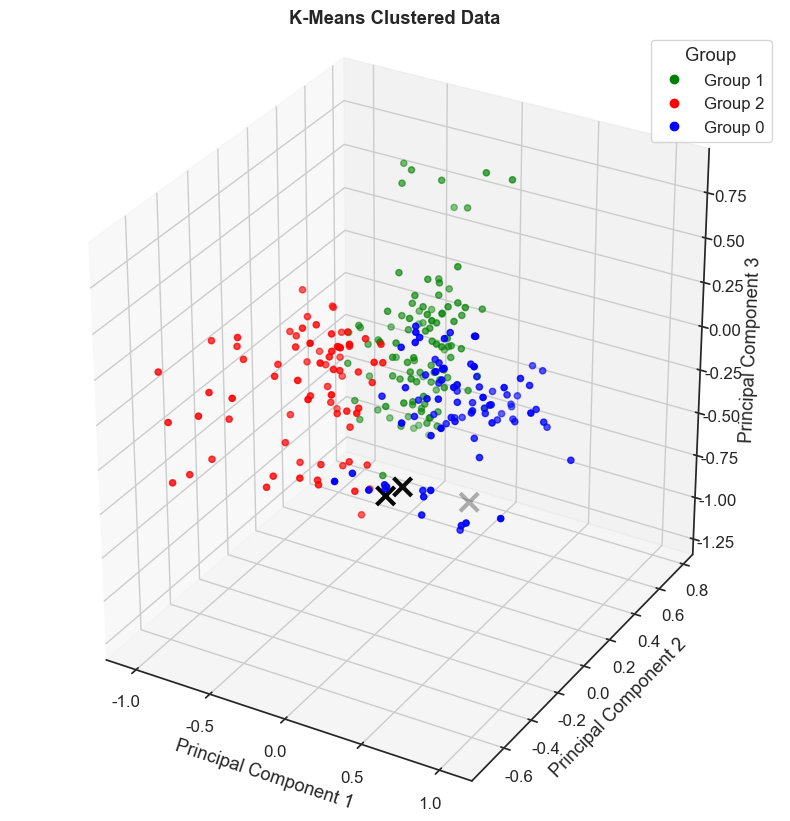

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Assuming pca_2_result is a 2D array with shape (n_samples, 3)
x_axis = pca_2_result[:, 0]
y_axis = pca_2_result[:, 1]
z_axis = pca_2_result[:, 2]  # Add the third component for the z-axis

sb.set(style="white", rc={"figure.figsize": (10, 10)}, font_scale=1.1)
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Define custom colors for each segment (green, red, blue)
segment_colors = {0: "green", 1: "red", 2:"blue"}

# 3D scatter plot with custom colors
scatter = ax.scatter(
    xs=x_axis,
    ys=y_axis,
    zs=z_axis,
    c=df_pca_kmeans["Segment K-means PCA"].map(segment_colors),
    label=df_pca_kmeans["Segment K-means PCA"],
)

# Centroids in 3D
ax.scatter(
    xs=centroids_pca[:, 0],
    ys=centroids_pca[:, 1],
    zs=centroids_pca[:, 2],
    marker="x",
    s=169,
    linewidths=3,
    color="black",
    zorder=10,
    lw=3,
    label="Centroids",
)

# Set labels and title
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("K-Means Clustered Data", fontweight="bold")

# Add legend with custom colors
legend_labels = df_pca_kmeans["Segment K-means PCA"].unique()
legend_elements = [
    plt.Line2D(
        [0], [0], marker="o", color=color, label=f"Group {label}", linestyle="None"
    )
    for label, color in zip(legend_labels, segment_colors.values())
]
ax.legend(handles=legend_elements, title="Group")
ax.set_box_aspect([0.8, 0.9, 0.9])  # Adjust the scaling factors as needed

# Save the figure to a file (e.g., PNG)
plt.savefig("3d_pca_plot.png")

plt.show()

In [ ]:
def backward_elimination(X, y):
    included = list(X.columns)

    while True:
        model = sm.OLS(endog=y, exog=X[included]).fit()
        rsquard_adj = model.rsquared_adj
        worst_feature = None
        changed = False

        for feature in included:
            droped_feature = [x for x in included if x != feature]
            droped_model = sm.OLS(endog=y, exog=X[droped_feature]).fit()
            if droped_model.rsquared_adj > rsquard_adj:
                # print(droped_model.rsquared_adj,rsquard_adj)
                worst_feature = feature
                break
        # print(included)
        if worst_feature:
            included.remove(worst_feature)
            changed = True

        if not changed:
            break

    model = sm.OLS(y, X[included]).fit()
    return model  # , included, rsquard_adj

In [ ]:
df_pca_kmeans

,경사도,양호비율,침수횟수,도로_건물_면적_비율,녹지_면적_비율,노후_건물_밀도(동/km²),지하건물_밀도(동/km²),하천면적/면적,하천까지의거리,일일최대강수량,평균고도,집중호우_발생횟수,빗물펌프장까지의거리,Segment K-means PCA
0,0.770108,0.905668,2,0.167866,0.281813,0.145247,0.127860,0.010605,0.144409,0.077736,0.528602,0.444444,0.734566,1
1,0.558745,0.973971,2,0.068699,0.205517,0.050641,0.071504,0.005532,0.008122,0.077736,1.000000,0.444444,0.703668,1
2,0.230100,0.674044,1,0.543326,0.159705,0.150145,0.324165,0.008511,0.048603,0.077736,0.200920,0.444444,0.506384,1
3,0.182421,0.968880,1,0.581359,0.166981,0.250783,0.356677,0.000000,0.154021,0.077736,0.145321,0.444444,0.310644,1
4,0.182421,0.942502,1,0.562603,0.156353,0.337010,0.460022,0.000000,0.241399,0.077736,0.193192,0.444444,0.417656,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0.124378,0.886254,19,0.776905,0.006560,0.590536,0.715109,0.000000,0.550464,0.292910,0.043416,0.666667,0.101679,2
262,0.167022,0.631655,12,0.655091,0.006302,0.203207,0.400194,0.000000,0.365005,0.292910,0.039133,0.666667,0.137349,0
263,0.425756,0.606482,9,0.521569,0.073081,0.188052,0.294912,0.001451,0.286596,0.292910,0.082390,0.666667,0.240590,0
264,0.365139,0.737013,3,0.305872,0.055683,0.003667,0.000470,0.000823,0.312417,0.292910,0.087607,0.666667,0.199084,0


In [ ]:
import pandas as pd


def process_cluster_label(data, cluster_label):
    # Filter data for the specified cluster label
    cluster_data = data[data["Segment K-means PCA"] == cluster_label]

    # Drop unnecessary columns
    cluster_data = cluster_data.drop(
        ["침수횟수",  "Segment K-means PCA"], axis=1
    )

    # Add the '침수횟수' column from the original data
    cluster_data = cluster_data.merge(
        data[["침수횟수"]], left_index=True, right_index=True
    )

    return cluster_data


r_group = {}
for i in range(0, 3):
    r_group[i] = process_cluster_label(df_pca_kmeans, i)

In [ ]:
r_group[0]

,경사도,양호비율,도로_건물_면적_비율,녹지_면적_비율,노후_건물_밀도(동/km²),지하건물_밀도(동/km²),하천면적/면적,하천까지의거리,일일최대강수량,평균고도,집중호우_발생횟수,빗물펌프장까지의거리,침수횟수
11,0.136816,0.420666,0.728506,0.054719,0.276868,0.231946,0.000127,0.126155,0.209577,0.116537,0.555556,0.431340,1
16,0.236318,0.341524,0.441098,0.253017,0.182427,0.199629,0.000000,0.283790,0.209577,0.284457,0.555556,0.189887,1
18,0.273632,0.363301,0.281928,0.006661,0.237129,0.126886,0.000000,0.321305,0.305348,0.070097,0.222222,0.122740,2
19,0.293532,0.901692,0.416537,0.131142,0.296627,0.236910,0.306587,0.110055,0.305348,0.041891,0.222222,0.024930,1
20,0.006219,0.283610,0.069191,0.023866,0.013634,0.012928,1.000000,0.051571,0.305348,0.001037,0.222222,0.058322,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,0.180348,0.894083,0.501796,0.004861,0.428870,0.480085,0.000000,0.643998,0.292910,0.064129,0.666667,0.095776,8
260,0.158582,0.626836,0.866288,0.029217,0.198994,0.309173,0.048812,0.130327,0.292910,0.029170,0.666667,0.067385,1
262,0.167022,0.631655,0.655091,0.006302,0.203207,0.400194,0.000000,0.365005,0.292910,0.039133,0.666667,0.137349,12
263,0.425756,0.606482,0.521569,0.073081,0.188052,0.294912,0.001451,0.286596,0.292910,0.082390,0.666667,0.240590,9


In [ ]:
model_0 = backward_elimination(
    r_group[0].drop(["침수횟수"], axis=1), r_group[0]["침수횟수"]
)
model_0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   침수횟수   R-squared (uncentered):                   0.529
Model:                            OLS   Adj. R-squared (uncentered):              0.506
Method:                 Least Squares   F-statistic:                              22.50
Date:                Mon, 20 Nov 2023   Prob (F-statistic):                    4.69e-15
Time:                        15:43:17   Log-Likelihood:                         -513.19
No. Observations:                 105   AIC:                                      1036.
Df Residuals:                     100   BIC:                                      1050.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
도로_건물_면적_비율    38.9807     15.289      2.550      0.012       8.648      69.313
하천까지의거리        20.0815     17.752      1.131      0.261     -15.138      55.301
일일최대강수량        66.2363     16.299      4.064      0.000      33.899      98.574
평균고도           84.0344     58.097      1.446      0.151     -31.228     199.296
집중호우_발생횟수     -74.0916     14.460     -5.124      0.000    -102.780     -45.403
==============================================================================
Omnibus:                       82.223   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              533.030
Skew:                           2.649   Prob(JB):                    1.79e-116
Kurtosis:                      12.684   Cond. No.                         16.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model_1 = backward_elimination(
    r_group[1].drop(["침수횟수"], axis=1), r_group[1]["침수횟수"]
)
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   침수횟수   R-squared (uncentered):                   0.413
Model:                            OLS   Adj. R-squared (uncentered):              0.372
Method:                 Least Squares   F-statistic:                              9.993
Date:                Mon, 20 Nov 2023   Prob (F-statistic):                    2.88e-07
Time:                        15:43:17   Log-Likelihood:                         -341.44
No. Observations:                  76   AIC:                                      692.9
Df Residuals:                      71   BIC:                                      704.5
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
도로_건물_면적_비율       -36.8496     22.411     -1.644      0.105     -81.537       7.837
녹지_면적_비율           20.4434     10.265      1.992      0.050      -0.024      40.911
노후_건물_밀도(동/km²)    53.2494     31.944      1.667      0.100     -10.445     116.944
일일최대강수량            64.2699     11.805      5.444      0.000      40.731      87.809
집중호우_발생횟수         -31.5905     11.139     -2.836      0.006     -53.801      -9.380
==============================================================================
Omnibus:                       94.322   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1719.817
Skew:                           3.686   Prob(JB):                         0.00
Kurtosis:                      25.107   Cond. No.                         10.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# model_2 = backward_elimination(
#     r_group[2].drop(["침수횟수"], axis=1), r_group[2]["침수횟수"]
# )
# model_2.summary()

In [ ]:
group_0 = df_pca_kmeans[df_pca_kmeans["Segment K-means PCA"] == 0]
group_1 = df_pca_kmeans[df_pca_kmeans["Segment K-means PCA"] == 1]
group_2 = df_pca_kmeans[df_pca_kmeans["Segment K-means PCA"] == 2]

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(group_0.drop(["침수횟수"], axis=1), group_0["침수횟수"])

# Extract feature importance scores
feature_importance = clf.feature_importances_

# Map feature importance scores to feature names (if available)
feature_names = group_0.drop(["침수횟수"], axis=1).columns
feature_importance_mapping = dict(zip(feature_names, feature_importance))

# Sort and print feature importance
sorted_feature_importance = sorted(
    feature_importance_mapping.items(), key=lambda x: x[1], reverse=True
)
for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: 녹지_면적_비율, Importance: 0.1634467642284816
Feature: 하천까지의거리, Importance: 0.11871289469536433
Feature: 평균고도, Importance: 0.1167886727027548
Feature: 일일최대강수량, Importance: 0.11181477156290359
Feature: 지하건물_밀도(동/km²), Importance: 0.10082563466869916
Feature: 도로_건물_면적_비율, Importance: 0.09795800423810448
Feature: 노후_건물_밀도(동/km²), Importance: 0.07489204409718761
Feature: 양호비율, Importance: 0.07098615496720916
Feature: 경사도, Importance: 0.04435352156324069
Feature: 집중호우_발생횟수, Importance: 0.04194760161818533
Feature: 빗물펌프장까지의거리, Importance: 0.04093623579271817
Feature: 하천면적/면적, Importance: 0.017337699865151227
Feature: Segment K-means PCA, Importance: 0.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(group_1.drop(["침수횟수"], axis=1), group_1["침수횟수"])

# Extract feature importance scores
feature_importance = clf.feature_importances_

# Map feature importance scores to feature names (if available)
feature_names = group_1.drop(["침수횟수"], axis=1).columns
feature_importance_mapping = dict(zip(feature_names, feature_importance))

# Sort and print feature importance
sorted_feature_importance = sorted(
    feature_importance_mapping.items(), key=lambda x: x[1], reverse=True
)
for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: 평균고도, Importance: 0.16509034986543633
Feature: 양호비율, Importance: 0.14756723294169777
Feature: 빗물펌프장까지의거리, Importance: 0.12932773109243695
Feature: 경사도, Importance: 0.12023131571469162
Feature: 일일최대강수량, Importance: 0.10491032621857539
Feature: 하천면적/면적, Importance: 0.08119763460939936
Feature: 도로_건물_면적_비율, Importance: 0.07798692810457515
Feature: 지하건물_밀도(동/km²), Importance: 0.04541549953314659
Feature: 집중호우_발생횟수, Importance: 0.043544690603514125
Feature: 하천까지의거리, Importance: 0.04002240896358543
Feature: 노후_건물_밀도(동/km²), Importance: 0.029803921568627444
Feature: 녹지_면적_비율, Importance: 0.014901960784313722
Feature: Segment K-means PCA, Importance: 0.0


In [ ]:
# from sklearn.tree import DecisionTreeClassifier


# # Create a Decision Tree Classifier
# clf = DecisionTreeClassifier(random_state=42)
# clf.fit(group_2.drop(["침수횟수"], axis=1), group_2["침수횟수"])

# # Extract feature importance scores
# feature_importance = clf.feature_importances_

# # Map feature importance scores to feature names (if available)
# feature_names = group_2.drop(["침수횟수"], axis=1).columns
# feature_importance_mapping = dict(zip(feature_names, feature_importance))

# # Sort and print feature importance
# sorted_feature_importance = sorted(
#     feature_importance_mapping.items(), key=lambda x: x[1], reverse=True
# )
# for feature, importance in sorted_feature_importance:
#     print(f"Feature: {feature}, Importance: {importance}")

In [ ]:
import sklearn.tree as sktree
import sklearn.metrics as skmet

해석을 위해서 원본의 값을 이용하는게 더 편하다

In [ ]:
selected_columns = [
    "경사도",
    "양호비율",
    "침수횟수",
    "도로_건물_면적_비율",
    "녹지_면적_비율",
    "노후_건물_밀도(동/km²)",
    "지하건물_밀도(동/km²)",
    "하천면적/면적",
    "하천까지의거리",
    "일일최대강수량",
    "평균고도",
    "집중호우_발생횟수",
    "빗물펌프장까지의거리",
]


df = df[selected_columns]

In [ ]:
target_col = "침수횟수"
feature_col = df.columns.difference(["Segment K-means PCA", target_col])

In [ ]:
feature_col

Index(['경사도', '노후_건물_밀도(동/km²)', '녹지_면적_비율', '도로_건물_면적_비율', '빗물펌프장까지의거리',
       '양호비율', '일일최대강수량', '지하건물_밀도(동/km²)', '집중호우_발생횟수', '평균고도', '하천까지의거리',
       '하천면적/면적'],
      dtype='object')

In [ ]:
df[feature_col]

,경사도,노후_건물_밀도(동/km²),녹지_면적_비율,도로_건물_면적_비율,빗물펌프장까지의거리,양호비율,일일최대강수량,지하건물_밀도(동/km²),집중호우_발생횟수,평균고도,하천까지의거리,하천면적/면적
0,0.314583,428.193833,0.225413,0.147000,5699.673727,0.906250,225.5,358.149780,11,147.729398,0.579168,7127.283260
1,0.229615,150.056370,0.164587,0.087765,5465.810242,0.974132,225.5,202.593010,11,273.213812,0.104944,3717.919278
2,0.097500,442.592593,0.128063,0.371271,3972.557785,0.676056,225.5,900.000000,11,60.501888,0.245802,5719.959259
3,0.078333,738.461538,0.133864,0.393989,2490.998419,0.969072,225.5,989.743590,11,45.701522,0.612614,0.000000
4,0.078333,991.964286,0.125391,0.382785,3300.974941,0.942857,225.5,1275.000000,11,58.444812,0.916657,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
261,0.055000,1737.313433,0.005971,0.510793,909.339214,0.886957,398.5,1979.104478,13,18.574853,1.992085,0.000000
262,0.072143,598.591549,0.005765,0.438031,1179.328824,0.633929,398.5,1109.859155,13,17.434927,1.346759,0.000000
263,0.176154,554.037267,0.059004,0.358275,1960.757507,0.608911,398.5,819.254658,13,28.949684,1.073927,974.857764
264,0.151786,11.956522,0.045133,0.229434,1646.603436,0.738636,398.5,6.521739,13,30.338302,1.163773,552.890217


In [ ]:
tree_regression = sktree.DecisionTreeRegressor(criterion="squared_error")
tree_regression.fit(X=df[feature_col], y=df[target_col])
print("전체데이터 사용시 depth : ", tree_regression.get_depth())
print("전체데이터 사용시 최종 leaf 개수", tree_regression.get_n_leaves())

전체데이터 사용시 depth :  20
전체데이터 사용시 최종 leaf 개수 209


In [ ]:
r_group[1]

,경사도,양호비율,도로_건물_면적_비율,녹지_면적_비율,노후_건물_밀도(동/km²),지하건물_밀도(동/km²),하천면적/면적,하천까지의거리,일일최대강수량,평균고도,집중호우_발생횟수,빗물펌프장까지의거리,침수횟수
0,0.770108,0.905668,0.167866,0.281813,0.145247,0.127860,0.010605,0.144409,0.077736,0.528602,0.444444,0.734566,2
1,0.558745,0.973971,0.068699,0.205517,0.050641,0.071504,0.005532,0.008122,0.077736,1.000000,0.444444,0.703668,2
2,0.230100,0.674044,0.543326,0.159705,0.150145,0.324165,0.008511,0.048603,0.077736,0.200920,0.444444,0.506384,1
3,0.182421,0.968880,0.581359,0.166981,0.250783,0.356677,0.000000,0.154021,0.077736,0.145321,0.444444,0.310644,1
4,0.182421,0.942502,0.562603,0.156353,0.337010,0.460022,0.000000,0.241399,0.077736,0.193192,0.444444,0.417656,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,0.426898,0.674086,0.122159,0.118483,0.039582,0.058090,0.014607,0.227655,0.651119,0.403013,0.555556,0.326696,35
218,0.443284,0.878877,0.000000,0.063347,0.013334,0.013536,0.013172,0.391821,0.651119,0.367452,0.555556,0.401108,3
232,0.519462,0.802519,0.405673,0.291916,0.397835,0.431222,0.007780,0.074433,0.552861,0.127728,0.555556,0.309183,27
251,0.483831,0.735208,0.215727,0.065083,0.093227,0.087745,0.002231,0.300357,0.292910,0.107840,0.666667,0.261473,2


In [ ]:
r_group[0] = r_group[0][feature_col]
r_group[1] = r_group[1][feature_col]
r_group[2] = r_group[2][feature_col]

In [ ]:
tree_cluster_df = {}
for i in r_group:
    tree_cluster_df[i] = df.loc[r_group[i].index]

In [ ]:
import sklearn.model_selection as skmod
import scipy as sp
import numpy as np

np.random.seed(10)
r2_score = skmet.make_scorer(skmet.r2_score)

In [ ]:
best_params = {}
for i in tree_cluster_df:
    params = {"max_depth": sp.stats.randint(1, 10)}
    random_tg_search = skmod.RandomizedSearchCV(
        tree_regression, param_distributions=params, cv=10, n_iter=300, random_state=13
    )
    random_tg_search.fit(
        X=tree_cluster_df[i][feature_col], y=tree_cluster_df[i][target_col]
    )
    best_params[i] = random_tg_search.best_params_

In [ ]:
best_params

{0: {'max_depth': 8}, 1: {'max_depth': 8}, 2: {'max_depth': 2}}

In [ ]:
tree_models = {}
for i in tree_cluster_df:
    sub_tree_regression = sktree.DecisionTreeRegressor(
        max_depth=best_params[i]["max_depth"], random_state=10
    )
    sub_tree_regression.fit(
        X=tree_cluster_df[i][feature_col], y=tree_cluster_df[i][target_col]
    )
    tree_models[i] = sub_tree_regression

In [ ]:
tree_models[0].feature_names_in_

array(['경사도', '노후_건물_밀도(동/km²)', '녹지_면적_비율', '도로_건물_면적_비율', '빗물펌프장까지의거리',
       '양호비율', '일일최대강수량', '지하건물_밀도(동/km²)', '집중호우_발생횟수', '평균고도',
       '하천까지의거리', '하천면적/면적'], dtype=object)

In [ ]:
info_result = pd.DataFrame(
    list(zip(tree_models[0].feature_names_in_, tree_models[0].feature_importances_))
).rename(columns={0: "feature_name", 1: "infomation_gain"})
info_result["infomation_gain"] = info_result["infomation_gain"].apply(lambda x: x * 100)
info_result.sort_values(by="infomation_gain", ascending=False, inplace=True)

In [ ]:
# info_
box_col = info_result["feature_name"]
rename_col = [x.replace("_per", "(%)") for x in box_col]
rename_col1 = [x.replace("율(%)", "율") for x in rename_col]
rename_col2 = [x.replace("율", "율(%)") for x in rename_col1]
info_result["feature_name"] = rename_col2
info_result.reset_index(inplace=True)

In [ ]:
info_result[["feature_name", "infomation_gain"]]

,feature_name,infomation_gain
0,일일최대강수량,30.889082
1,지하건물_밀도(동/km²),20.609114
2,하천까지의거리,16.621169
3,노후_건물_밀도(동/km²),15.076050
4,양호비율(%),13.146405
5,도로_건물_면적_비율(%),1.747520
6,빗물펌프장까지의거리,0.664390
7,녹지_면적_비율(%),0.655820
8,경사도,0.275457
9,평균고도,0.251631


In [ ]:
tree_models = {}
for i in tree_cluster_df:
    sub_tree_regression = sktree.DecisionTreeRegressor(
        max_depth=best_params[i]["max_depth"], random_state=10
    )
    sub_tree_regression.fit(
        X=tree_cluster_df[i][feature_col], y=tree_cluster_df[i][target_col]
    )
    tree_models[i] = sub_tree_regression

In [ ]:
r2_score = []
for i in tree_cluster_df:
    print(
        f"{i+1}번째 군집의 침수빈도 tree regression r2 score : ",
        skmet.r2_score(
            y_pred=tree_models[i].predict(X=tree_cluster_df[i][feature_col]),
            y_true=tree_cluster_df[i][target_col],
        ),
    )
    r2_score.append(
        skmet.r2_score(
            y_pred=tree_models[i].predict(X=tree_cluster_df[i][feature_col]),
            y_true=tree_cluster_df[i][target_col],
        )
    )

1번째 군집의 침수빈도 tree regression r2 score :  0.9985064595511483
2번째 군집의 침수빈도 tree regression r2 score :  0.9987553933560397
3번째 군집의 침수빈도 tree regression r2 score :  0.4958053954864684


In [ ]:
for i in tree_cluster_df:
    print(tree_cluster_df[i]["침수횟수"].median())

9.0
3.0
10.0


In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Malgun Gothic"

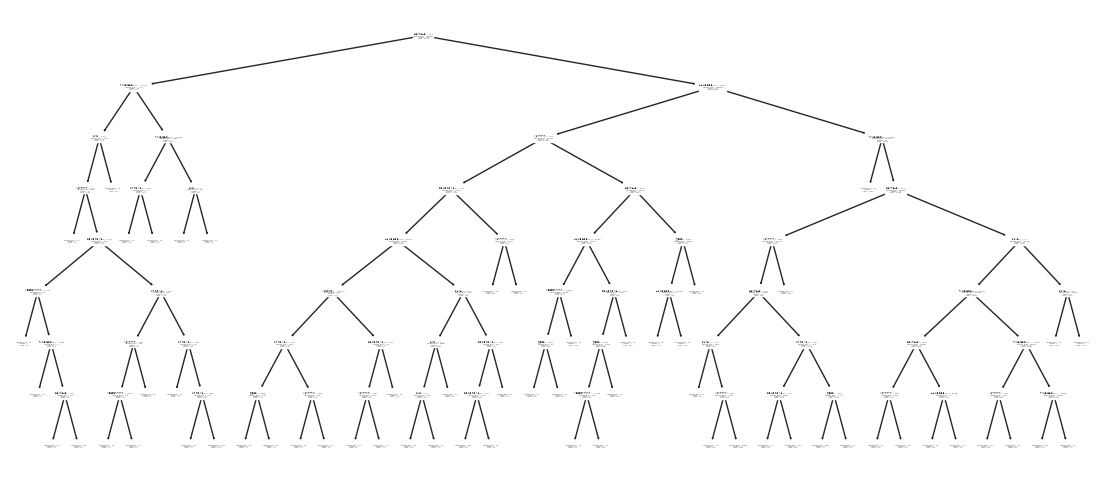

In [ ]:
plt.figure(figsize=(14, 6))
box_col = tree_models[0].feature_names_in_
rename_col = [x.replace("_per", "(%)") for x in box_col]
rename_col1 = [x.replace("율(%)", "율") for x in rename_col]
rename_col2 = [x.replace("율", "율(%)") for x in rename_col1]
sktree.plot_tree(tree_models[0], feature_names=rename_col2)
plt.savefig("tree[0].png", dpi=1000, bbox_inches="tight")

plt.show()
plt.close()

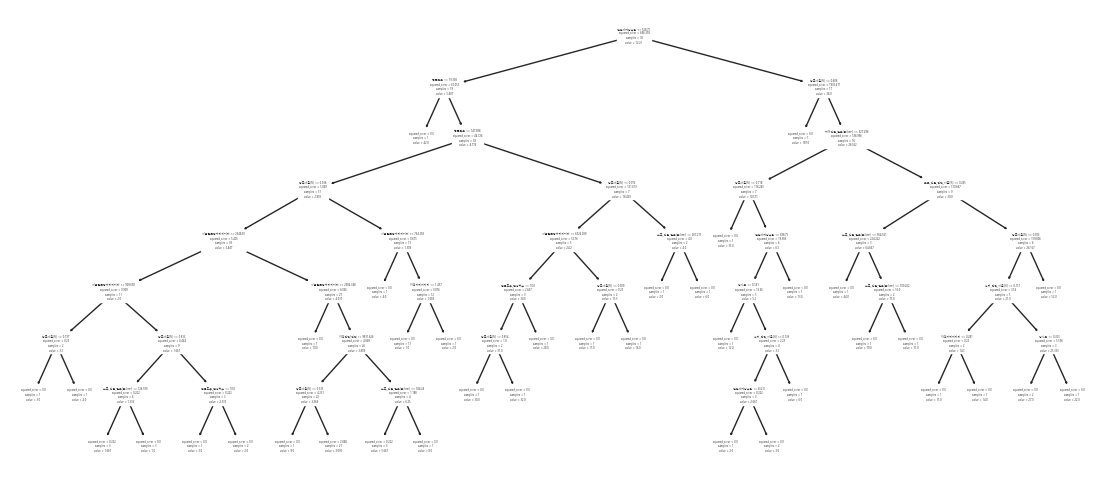

In [ ]:
plt.figure(figsize=(14, 6))
box_col = tree_models[1].feature_names_in_
rename_col = [x.replace("_per", "(%)") for x in box_col]
rename_col1 = [x.replace("율(%)", "율") for x in rename_col]
rename_col2 = [x.replace("율", "율(%)") for x in rename_col1]
sktree.plot_tree(tree_models[1], feature_names=rename_col2)
plt.savefig("./tree[1].png", dpi=1000, bbox_inches="tight")
plt.show()
plt.close()

In [ ]:
# plt.figure(figsize=(14, 6))
# box_col = tree_models[2].feature_names_in_
# rename_col = [x.replace("_per", "(%)") for x in box_col]
# rename_col1 = [x.replace("율(%)", "율") for x in rename_col]
# rename_col2 = [x.replace("율", "율(%)") for x in rename_col1]
# sktree.plot_tree(tree_models[2], feature_names=rename_col2)
# plt.savefig("tree[2].png", dpi=1000, bbox_inches="tight")

# plt.show()
# plt.close()

In [ ]:
def sub_backward_elimination(X, y, fixed):
    included = list(X.columns.difference(fixed))

    while True:
        model = sm.OLS(endog=y, exog=X[included + fixed]).fit()
        rsquard_adj = model.rsquared_adj
        worst_feature = None
        changed = False

        for feature in included:
            droped_feature = [x for x in included if x != feature]
            droped_model = sm.OLS(endog=y, exog=X[droped_feature + fixed]).fit()
            if droped_model.rsquared_adj > rsquard_adj:
                # print(droped_model.rsquared_adj,rsquard_adj)
                worst_feature = feature
                break
        # print(included)
        if worst_feature:
            included.remove(worst_feature)
            changed = True

        if not changed:
            break

    model = sm.OLS(y, X[included + fixed]).fit()
    return model  # , included, rsquard_adj

In [ ]:
feature_col

Index(['경사도', '노후_건물_밀도(동/km²)', '녹지_면적_비율', '도로_건물_면적_비율', '빗물펌프장까지의거리',
       '양호비율', '일일최대강수량', '지하건물_밀도(동/km²)', '집중호우_발생횟수', '평균고도', '하천까지의거리',
       '하천면적/면적'],
      dtype='object')

In [ ]:
out_Nomal_Regression_Result = {}
use_feature = {
    2: ["양호비율", "녹지_면적_비율", "하천면적/면적"],
    1: [
        "일일최대강수량",
        "양호비율",
        "노후_건물_밀도(동/km²)",
        "녹지_면적_비율",
        "빗물펌프장까지의거리",
        "평균고도",
        "지하건물_밀도(동/km²)",
        "하천까지의거리",
    ],
    0: ["일일최대강수량", "도로_건물_면적_비율", "하천면적/면적", "양호비율"],
}
for i in tree_cluster_df:
    X = tree_cluster_df[i][feature_col]
    X2 = sm.add_constant(tree_cluster_df[i][feature_col])
    # X=clustered_df[i][list(feature_col)+["const"]]
    y = tree_cluster_df[i][target_col]
    temp1 = sub_backward_elimination(X=X, y=y, fixed=use_feature[i])
    temp2 = sub_backward_elimination(X=X2, y=y, fixed=use_feature[i])
    if temp1.rsquared >= temp2.rsquared:
        out_Nomal_Regression_Result[i] = temp1
    else:
        out_Nomal_Regression_Result[i] = temp2

In [ ]:
out_Nomal_Regression_Result[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   침수횟수   R-squared (uncentered):                   0.534
Model:                            OLS   Adj. R-squared (uncentered):              0.495
Method:                 Least Squares   F-statistic:                              13.89
Date:                Mon, 20 Nov 2023   Prob (F-statistic):                    2.88e-13
Time:                        15:44:22   Log-Likelihood:                         -512.69
No. Observations:                 105   AIC:                                      1041.
Df Residuals:                      97   BIC:                                      1063.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
노후_건물_밀도(동/km²)     0.0190      0.013      1.436      0.154      -0.007       0.045
집중호우_발생횟수          -6.1085      1.484     -4.117      0.000      -9.053      -3.164
평균고도                0.3231      0.237      1.360      0.177      -0.148       0.794
하천까지의거리             6.2485      5.253      1.190      0.237      -4.177      16.674
일일최대강수량             0.0979      0.022      4.454      0.000       0.054       0.142
도로_건물_면적_비율        64.7202     37.981      1.704      0.092     -10.661     140.101
하천면적/면적          9.306e-06   2.65e-05      0.352      0.726   -4.32e-05    6.18e-05
양호비율              -10.0590     18.314     -0.549      0.584     -46.407      26.288
==============================================================================
Omnibus:                       82.983   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              543.703
Skew:                           2.677   Prob(JB):                    8.64e-119
Kurtosis:                      12.778   Cond. No.                     1.84e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.84e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
out_Nomal_Regression_Result[1].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   침수횟수   R-squared (uncentered):                   0.403
Model:                            OLS   Adj. R-squared (uncentered):              0.323
Method:                 Least Squares   F-statistic:                              5.022
Date:                Mon, 20 Nov 2023   Prob (F-statistic):                    3.59e-05
Time:                        15:44:22   Log-Likelihood:                         -342.10
No. Observations:                  76   AIC:                                      702.2
Df Residuals:                      67   BIC:                                      723.2
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
집중호우_발생횟수          -1.8569      1.425     -1.303      0.197      -4.701       0.987
일일최대강수량             0.0795      0.018      4.409      0.000       0.043       0.115
양호비율              -14.6228     17.290     -0.846      0.401     -49.134      19.888
노후_건물_밀도(동/km²)     0.0219      0.020      1.108      0.272      -0.018       0.061
녹지_면적_비율           21.3176     14.268      1.494      0.140      -7.161      49.796
빗물펌프장까지의거리         -0.0006      0.002     -0.334      0.739      -0.004       0.003
평균고도                0.0895      0.069      1.304      0.197      -0.048       0.227
지하건물_밀도(동/km²)     -0.0163      0.018     -0.893      0.375      -0.053       0.020
하천까지의거리            -0.8433      6.032     -0.140      0.889     -12.883      11.197
==============================================================================
Omnibus:                       97.744   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1907.541
Skew:                           3.872   Prob(JB):                         0.00
Kurtosis:                      26.290   Cond. No.                     2.37e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# out_Nomal_Regression_Result[2].summary()


In [ ]:
data = pd.read_excel("./데이터/전체자료_(강우량추가).xlsx")


In [ ]:
data["침수여부"] = data["침수횟수"].apply(lambda x: 1 if x > 0 else 0)
data = data.loc[data["침수횟수"] > 0]
data

,Unnamed: 0,GU_NAME,ADM_NM,동면적(k㎡),인구수,인구밀도(명/km²),동단위우량,동단위시우량,침수횟수,경사도,...,지하건물,지하건물_밀도(동/km²),빗물펌프장까지의거리,평균고도,하천까지의거리,일일최대강수량,집중호우_발생횟수,하천면적,하천면적/면적,침수여부
2,2,종로구,부암동,2.27,9460,4167.400881,16.725406,0.699515,2,0.314583,...,813,358.149780,5699.673727,147.729398,0.579168,225.5,11,16178.933,7127.283260,1
3,3,종로구,평창동,8.87,17743,2000.338219,65.354340,2.733348,2,0.229615,...,1797,202.593010,5465.810242,273.213812,0.104944,225.5,11,32977.944,3717.919278,1
5,5,종로구,가회동,0.54,4084,7562.962963,3.978731,0.166404,1,0.097500,...,486,900.000000,3972.557785,60.501888,0.245802,225.5,11,3088.778,5719.959259,1
6,6,종로구,이화동,0.78,7651,9808.974359,5.747056,0.240362,1,0.078333,...,772,989.743590,2490.998419,45.701522,0.612614,225.5,11,0.000,0.000000,1
7,7,종로구,혜화동,1.12,19570,17473.214290,8.252183,0.345135,1,0.078333,...,1428,1275.000000,3300.974941,58.444812,0.916657,225.5,11,0.000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,401,강동구,성내2동,0.67,23414,34946.268660,5.893320,0.239663,19,0.055000,...,1326,1979.104478,909.339214,18.574853,1.992085,398.5,13,0.000,0.000000,1
402,402,강동구,성내3동,0.71,22984,32371.830990,6.245160,0.253972,12,0.072143,...,788,1109.859155,1179.328824,17.434927,1.346759,398.5,13,0.000,0.000000,1
403,403,강동구,길동,1.61,45225,28090.062110,14.161560,0.575907,9,0.176154,...,1319,819.254658,1960.757507,28.949684,1.073927,398.5,13,1569.521,974.857764,1
404,404,강동구,둔촌1동,0.92,74,80.434783,8.092320,0.329090,3,0.151786,...,6,6.521739,1646.603436,30.338302,1.163773,398.5,13,508.659,552.890217,1


In [ ]:
data = data.drop(
    columns=[
        "Unnamed: 0",
        "지하건물",
        "동면적(k㎡)",
        "노후건물개수",
        "인구수",
        "동단위우량",
        "동단위시우량",
        "구난시설",
        "행정동_코드",
        "월평균소득",
        "분기평균총지출",
        "고령자비율",
        "장애인비율",
        "행정동코드",
        "면적",
    ],
    axis=1,
)

In [ ]:
data =data.reset_index()

In [ ]:
data =data.drop('index', axis=1)

In [ ]:
data['group'] = df_pca_kmeans["Segment K-means PCA"]

In [ ]:
data.to_csv("./데이터/지도 시각화.csv")

In [ ]:
data['Group'] = df_pca_kmeans['Segment K-means PCA']

In [ ]:
data.loc[data['GU_NAME'] == '관악구']

,GU_NAME,ADM_NM,인구밀도(명/km²),침수횟수,경사도,양호비율,도로_건물_면적_비율,녹지_면적_비율,제방,수문,...,빗물펌프장까지의거리,평균고도,하천까지의거리,일일최대강수량,집중호우_발생횟수,하천면적,하천면적/면적,침수여부,group,Group
188,관악구,보라매동,32456.578950,67,0.194583,0.827586,0.502729,0.103930,0,0,...,731.969136,46.714387,0.926073,711.0,10,0.000,0.000000,1,2,2
189,관악구,행운동,41202.777780,9,0.188500,0.888889,0.474772,0.055632,0,0,...,2621.352094,60.032052,1.556629,711.0,10,0.000,0.000000,1,2,2
190,관악구,낙성대동,7925.110132,44,0.236429,0.754386,0.142234,0.182531,9,12,...,3278.461542,127.345903,1.775550,711.0,10,5434.069,2393.862996,1,1,1
191,관악구,중앙동,40479.487180,27,0.122500,0.913043,0.579165,0.007253,0,0,...,1893.187841,37.064189,1.736577,711.0,10,0.000,0.000000,1,2,2
192,관악구,인헌동,24195.370370,15,0.239643,0.892617,0.315027,0.079923,12,7,...,2750.850839,122.672718,0.238748,711.0,10,3632.107,3363.062037,1,1,1
193,관악구,남현동,5545.871560,13,0.210667,0.813167,0.090857,0.141096,14,20,...,2796.756813,160.683944,0.686949,711.0,10,15331.994,4688.683180,1,1,1
194,관악구,서원동,36412.307690,10,0.188750,0.536585,0.489834,0.060195,23,11,...,552.438576,50.738842,0.156660,711.0,10,16150.746,24847.301538,1,2,2
195,관악구,신원동,33983.636360,97,0.179286,0.296875,0.501922,0.014417,6,10,...,599.560932,40.199233,0.454984,711.0,10,0.000,0.000000,1,2,2
196,관악구,서림동,24796.969700,14,0.230000,0.805310,0.326969,0.031870,22,4,...,1674.218284,68.963617,0.323062,711.0,10,8355.990,8440.393939,1,1,1
197,관악구,신림동,44770.370370,167,0.079000,0.205128,0.562518,0.003602,7,1,...,358.666726,21.677555,0.347073,711.0,10,13485.716,24973.548148,1,2,2


In [ ]:
data.to_csv("./데이터/멋지게.csv")